<a href="https://colab.research.google.com/github/Rub-T/challenge_TelecomX/blob/main/Challenge_telecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

##Importacion de librerias

In [23]:
#Aqui se importaran todas las bibliotecas que se necesiten en el proceso
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns
import plotly.express as px

##Extraccion del archivo json

In [2]:
#Creamos la variable para nuestros datos y los extraemos con requests, posteriormento los normalizamos a un dataframe
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
result=requests.get(url)
df=result.json()
datos=pd.json_normalize(df)

Chequeo de informacion general de los datos

In [3]:
datos.sample(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
4390,6016-EJGNT,,Female,0,Yes,Yes,48,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),103.25,5037.55
2488,3472-OAOOR,No,Male,0,Yes,Yes,19,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,34.95,610.2
3545,4884-TVUQF,No,Female,1,No,No,57,Yes,Yes,Fiber optic,...,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),101.30,5779.6
1588,2257-BOVXD,No,Male,0,Yes,No,14,Yes,Yes,DSL,...,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),66.60,979.5
3378,4691-NEWPF,,Male,0,Yes,No,11,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.90,521.9
3485,4818-DRBQT,Yes,Male,0,Yes,No,29,Yes,Yes,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.15,2265.25
1192,1699-UOTXU,No,Male,0,No,No,60,Yes,No,DSL,...,Yes,Yes,No,No,No,Two year,No,Electronic check,61.40,3638.25
3072,4283-IVYCI,No,Male,0,No,No,9,Yes,No,DSL,...,No,No,Yes,No,Yes,Month-to-month,No,Mailed check,64.95,547.8
861,1218-VKFPE,Yes,Female,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.00,233.55
6578,9052-DHNKM,No,Male,0,No,No,26,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,No,Electronic check,61.55,1581.95


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformación

##Transformando datos numericos

Nos dimos cuenta de que al querer transformar los datos de la columna de ingresos total no nos dejaba porque tenia datos de string asi que los manejaremos.

In [5]:
#Convertimos los datos a string para poder manejarlos
datos['account.Charges.Total']=datos['account.Charges.Total'].astype(str)

#Convertimos los datos vacios a nan
datos['account.Charges.Total']=datos['account.Charges.Total'].replace(' ',np.nan)

In [6]:
#checamos cuantos nan tenemos
datos.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [7]:
#Al ser muy pocos, los borramos
datos=datos.dropna()

In [8]:
#Confirmamos
datos['account.Charges.Total'].isnull().sum()

np.int64(0)

In [9]:
#Convertimos a dato numerico y confirmamos que este todo bien
datos['account.Charges.Total']=datos['account.Charges.Total'].astype(np.float64)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7256 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   object 
 5   customer.Dependents        7256 non-null   object 
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   object 
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

##Transformando strings

In [10]:
#Hacemos evaluacion de como estan los string
datos.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
208,0319-QZTCO,No,Female,0,Yes,Yes,3,Yes,No,DSL,...,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),58.70,168.60
1881,2672-HUYVI,Yes,Female,0,No,No,6,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,91.10,455.30
1991,2817-NTQDO,Yes,Male,0,No,No,13,No,No phone service,DSL,...,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),45.55,597.00
5605,7658-UYUQS,No,Male,1,Yes,No,21,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,Month-to-month,No,Bank transfer (automatic),86.55,1857.25
1075,1513-XNPPH,Yes,Female,0,No,No,12,Yes,No,Fiber optic,...,No,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,89.40,1095.65


In [11]:
#Hacemos filtro de columnas str y las volvemos minusculas
column_str=['Churn','customer.gender','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService',
            'internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract',
            'account.PaperlessBilling','account.PaymentMethod']
for i in column_str:
  datos[i]=datos[i].str.lower()

datos.sample(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
2245,3134-JCVOE,,female,0,no,no,3,no,no phone service,dsl,...,yes,no,no,no,no,month-to-month,no,mailed check,29.2,98.50
6530,8976-OQHGT,yes,female,0,yes,yes,4,yes,no,dsl,...,yes,no,yes,no,no,month-to-month,no,mailed check,56.5,235.10
7040,9699-UBQFS,no,female,1,yes,no,43,yes,yes,fiber optic,...,yes,no,no,yes,no,month-to-month,yes,electronic check,94.5,4156.80
5217,7123-WQUHX,no,male,0,no,no,38,yes,yes,fiber optic,...,no,yes,yes,yes,no,one year,no,bank transfer (automatic),95.0,3605.60
5697,7783-YKGDV,yes,female,0,no,no,12,yes,yes,fiber optic,...,yes,yes,no,no,yes,month-to-month,yes,bank transfer (automatic),99.7,1238.45


##Creando valores binarios de 1 y 0

Ahora convertiremos en valores binarios las columnas que solo tengan valores de si y no, si contienen otro parametro no contaran

In [12]:
#Lista de columnas con valores solo de si y no
col_bin=['Churn','customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']

for i in col_bin:
  print(f'La columna {i} tiene estos datos: {datos[i].unique()}')

La columna Churn tiene estos datos: ['no' 'yes' '']
La columna customer.Partner tiene estos datos: ['yes' 'no']
La columna customer.Dependents tiene estos datos: ['yes' 'no']
La columna phone.PhoneService tiene estos datos: ['yes' 'no']
La columna account.PaperlessBilling tiene estos datos: ['yes' 'no']


In [13]:
#Como la columna churn tiene valores vacios, la trabajaremos aparte
datos['Churn']=datos['Churn'].replace('',np.nan)
datos['Churn'].unique()

array(['no', 'yes', nan], dtype=object)

In [14]:
#Convertimos yes y no en 1 y 0
datos['Churn']=datos['Churn'].replace({'yes':'1','no':'0'})
datos['Churn'].unique()

array(['0', '1', nan], dtype=object)

In [15]:
#Ahora lo haremos con todas las demas
col_bin=['customer.Partner','customer.Dependents','phone.PhoneService','account.PaperlessBilling']
for col in col_bin:
  datos[col]=datos[col].replace({'yes':'1','no':'0'})
  datos[col]=datos[col].astype(np.int64)

for col in col_bin:
  print(f'{col}:{datos[col].unique()}')

customer.Partner:[1 0]
customer.Dependents:[1 0]
phone.PhoneService:[1 0]
account.PaperlessBilling:[1 0]


In [16]:
#Confirmamos que todo este bien
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7256 non-null   object 
 3   customer.SeniorCitizen     7256 non-null   int64  
 4   customer.Partner           7256 non-null   int64  
 5   customer.Dependents        7256 non-null   int64  
 6   customer.tenure            7256 non-null   int64  
 7   phone.PhoneService         7256 non-null   int64  
 8   phone.MultipleLines        7256 non-null   object 
 9   internet.InternetService   7256 non-null   object 
 10  internet.OnlineSecurity    7256 non-null   object 
 11  internet.OnlineBackup      7256 non-null   object 
 12  internet.DeviceProtection  7256 non-null   object 
 13  internet.TechSupport       7256 non-null   object 
 1

In [17]:
#Checamos nuestros datos nulos
datos.isnull().sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


##Agregamos columna de ingreso por día

In [18]:
datos['cuentas_diarias']=round(datos['account.Charges.Monthly']/30,2)
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.80


##Datos generales

In [19]:
datos.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
count,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158467
std,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004282
min,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.180000
50%,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.340000
75%,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,3.000000
max,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [20]:
#Creamos copia de nuestros datos principales
datos_resp=datos.copy()

#📊 Carga y análisis

###Analisis mediante visualización de numero de bajas

In [21]:
#Sumamos nuestros datos para analisis de baja
df_churn=datos['Churn'].value_counts()

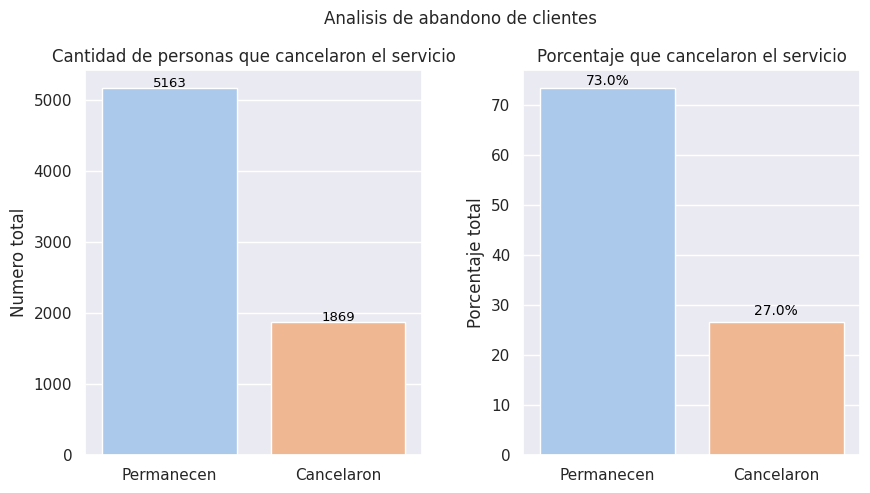

In [26]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Analisis de abandono de clientes',y=1,fontsize=12)
fig.subplots_adjust(hspace=0.5,wspace=0.3)

#Grafica de bajas con representacion numerica
def graficar_churn_numeros(datos,ax,titulo):
  sns.barplot(x=datos.index,y=datos.values,hue=df_churn.index,ax=ax,palette='pastel')
  ax.set_title(titulo)
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecen','Cancelaron'])
  ax.set_ylabel('Numero total')
  ax.set_xlabel('')

  for i,j in enumerate(df_churn.values):
    ax.text(i,j+20,str(j),color='black',fontsize=9.5,ha='center')

#Grafica de bajas con representacion porcentual
def graficar_churn_porcentajes(datos,ax,titulo):
  sns.barplot(x=datos.index,y=((datos.values)/(datos.values.sum())*100),hue=datos.index,ax=ax,palette='pastel')
  ax.set_title(titulo)
  ax.set_xticks([0,1])
  ax.set_xticklabels(['Permanecen','Cancelaron'])
  ax.set_ylabel('Porcentaje total')
  ax.set_xlabel('')

  for i,j in enumerate(((datos.values)/(datos.values.sum())*100).round(0)):
    ax.text(i,j+1,str(f'{j}%'),color='black',fontsize=10,ha='center')

#Mostramos graficas
graficar_churn_numeros(df_churn,ax[0],'Cantidad de personas que cancelaron el servicio')
graficar_churn_porcentajes(df_churn,ax[1],'Porcentaje que cancelaron el servicio')
plt.show()

###Analisis medianre visualizacion de datos categoricos

In [27]:
#Renombramos nuestras variables categoricas
datos_resp.rename(columns={'Churn':'Baja','customer.gender':'Genero','internet.InternetService':'servicio_internet',
                           'account.Contract':'tipo_de_contrato','account.PaymentMethod':'forma_pago'},inplace=True)
datos_resp.columns

Index(['customerID', 'Baja', 'Genero', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'servicio_internet',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'tipo_de_contrato',
       'account.PaperlessBilling', 'forma_pago', 'account.Charges.Monthly',
       'account.Charges.Total', 'cuentas_diarias'],
      dtype='object')

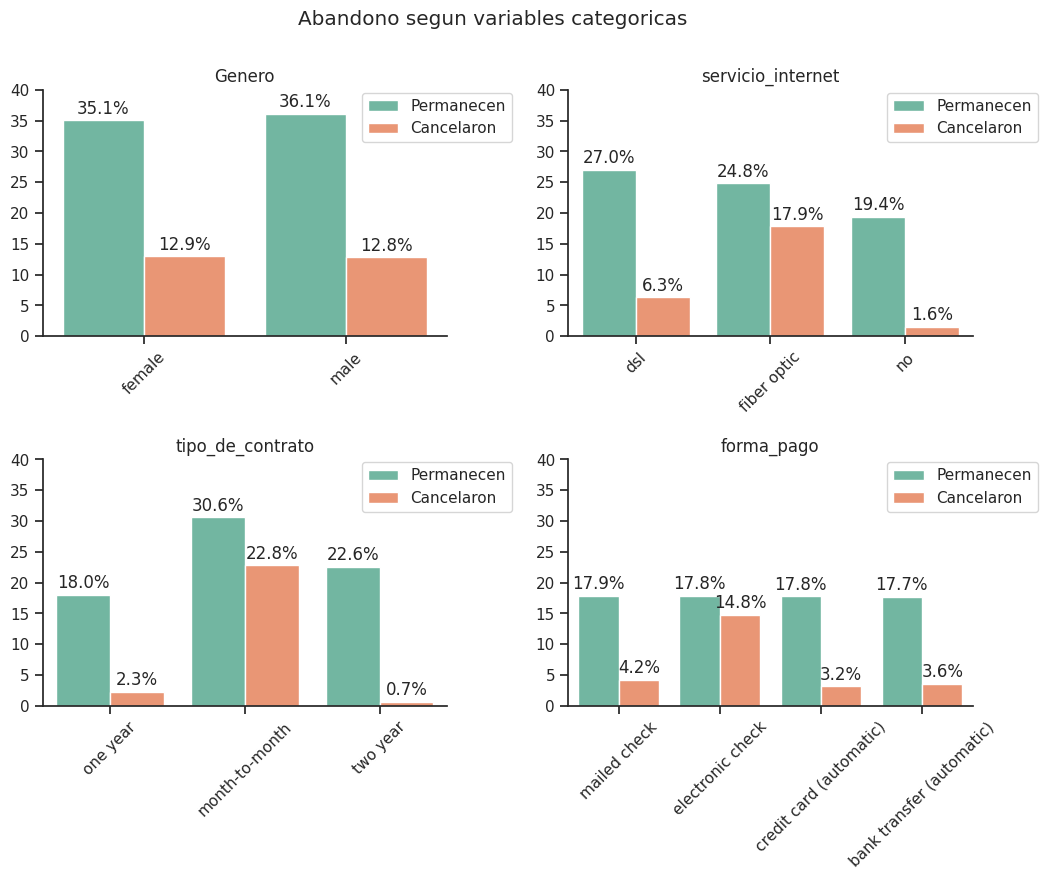

In [35]:
#Creamos lista con las columnas que analizaremos
analisis=['Genero','servicio_internet','tipo_de_contrato','forma_pago']

fig, axs=plt.subplots(2,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.5,wspace=0.3)
fig.suptitle('Abandono segun variables categoricas')
axs=axs.flatten()

#For para generacion multiple de graficas
for i, var in enumerate(analisis):
  ax=axs[i]
  ax=sns.countplot(data=datos_resp,x=var,hue='Baja',stat='percent',ax=ax,palette='Set2')
  custom_params = {"axes.spines.right": False, "axes.spines.top": False}
  sns.set_theme(style="ticks", rc=custom_params)
  ax.set_title(f'{var}')
  ax.set_ylabel('')
  ax.set_xlabel('')
  ax.set_ylim(0,40)
  ax.tick_params(axis='x',rotation=45)
  ax.legend(['Permanecen','Cancelaron'],bbox_to_anchor=(1.18,1.02))

  for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

plt.show()

###Analisis medianre visualizacion de datos numericos

In [30]:
#Renombramos columnas que vamos a analizar y creamos lista para filtrarlas
datos_resp.rename(columns={'account.Charges.Total':'gasto_total','account.Charges.Monthly':'gasto_mensual'},inplace=True)
col_numericas=['gasto_total','gasto_mensual']

In [34]:
#For para generación de las graficas tipo box
for i in col_numericas:
  fig= px.box(datos_resp,x='Baja',y=datos_resp[i],points='all',color='Baja',notched=True)

  fig.update_layout(width=800,height=450,title=dict(text=f'Analisis de bajas por {i} total de clientes',x=0.5,xanchor='center'),
                    xaxis_title='',yaxis_title='Total',
                    font_family='Arial',font_size=20,font_color='black',
                    xaxis=dict(tickvals = [0, 1],ticktext=['Permanecen','Baja']),showlegend=False)

  fig.show()

#📄Informe final

###**Analisis📝**

Según los procesos de analisis y de visualizacion del contenido de los datos, podemos confirmar los siguientes puntos a tomar en cuenta:

1.   Se ha tenido una perdida de casi el 30% de los clientes recurrentes.
2.   Las perdidas segun las variables categorias por hombre y mujer son las mismas por lo que este no es un elemento determinante.
3.   El tipo de contrato nos demuestra que los que pagan mes con mes son los mas propensos a dejar el servicio, asi mismo los que utilizan como forma de pago el cheque electronico que no se hace en automatico por lo que estos son puntos importantes a tener en cuenta
4.   En cuanto al gasto anual podmeos ver una perdida de clientes hasta llegar a un umbral de los 3000 dolares que es cuando se estabiliza y hay menos personas que cancelan.
5. En el gasto mensual tenemos una perdida significativa de clientes al llegar al umbral de los 70 dolares, es apartir de ahi que se registran más perdidas de clientes.



###**Recomendaciones**

Dado a los resultados observados se pueden plantear las siguientes recomendaciones para mejorar el mantenimiento de los clientes en el servicio:

1. Mejorar el sistema de contrato por mes:\
El contrato por mes es el que más perdidas tiene, por ende se debe mejorar esta forma de contratación ya que normalmente es este el que los usuarios utilizan como forma de "prueba" para decidir si quedarse o no con el servicio, por ende debe ser el sistema de amarre de los usuarios, podrian hacerse descuentos a los usuarios que los usan por primera vez o disminuir su costo directamente, otro sistema sería mejorar su servicio, ofrecer más funciones para que el usuario decida quedarse más tiempo.

2. Mejorar las formas de pago:\
Los sistemas de pago con mayor exito son los que ya son automatizados, ya que quitan la tarea del usuario de volver a hacer el movimiento de pago por lo que es recomendable que todos los sistemas de pago digitales se puedan ser automatizados, asi el usuario no tiene que pasar por el filtro de hacer el pago manualmente.

3. Sitema de internet de fibra optica:
Como podemos observar, los usuarios que tienen el servicio internet de fibra optica son los que tienen mayor porcentaje de dejar el servicio, por lo que algo en este servicio no esta cumpliendo con las espectativas del usuario, esto puede deberse a que el sistema no proporciona las velocidades de internet que se ofrecen, esto es un problema ya que normalmente este tipo de servicio es de los más caros por lo que es normal que si no cumplen con las espectativas del usuario, estos son más propensos a dejar el servicio.

###**Conclusión**

Como conclusión podemos decir que las mejoras a implementar tienen que ver principalmente con el tipo de servicio que se proporciona, no con el personal o la infraestructura en si.

Sabiendo esto, se deben desarrollar campañas para mejorar las experiencias de los nuevos clientes e incentivarlos para que estos pasen el umbral de contratación por mes a plazos más largos, promover la digitalizacion de los medios de pago del servicio y hacer un analisis directo con el cliente sobre el servicio de fibra optica, saber cuales son las razones principales por las que el servicio no está funcionando y de ser necesario, reforzar su infraestructura o soporte.